In [1]:
#para poner un mapa de la zona como fondo
!pip install basemap
#actualizo matplotlib a la ultima version porque me facilita el codigo del 3er grafico.
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.basemap import Basemap #Para poner el mapa de fondo

pd.set_option('display.max_columns', None)

churn_ds = pd.read_csv('https://github.com/Lemonpi3/datasets-coderhouse/blob/main/telecom_customer_churn.csv?raw=true')

In [3]:
churned_users = churn_ds.loc[churn_ds['Customer Status']=='Churned']
##en que ciudades hay mas churned?
top_churned_cities = churned_users['City'].value_counts()
top_churned_cities

San Diego         185
Los Angeles        78
San Francisco      31
San Jose           29
Sacramento         26
                 ... 
Imperial Beach      1
San Bruno           1
Fields Landing      1
El Sobrante         1
King City           1
Name: City, Length: 777, dtype: int64

In [4]:
#@title
# fig, ax = plt.subplots(figsize=(8, 8))

# m = Basemap(projection='lcc', resolution='i', 
#             lat_0=37.5, lon_0=-119,
#             width=1E6, height=1.2E6)

# m.drawcoastlines(color='gray')
# m.drawcountries(color='gray')
# m.drawstates(color='gray')

# x, y = m(-121.49,38.58)
# ax.annotate('• Sacramento', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=1,color='darkgray')
# x, y = m(-118.24,34.05)
# ax.annotate('• Los Angeles', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=1,color='darkgray')
# x, y = m(-122.41,37.77)
# ax.annotate('• San Francisco', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=1,color='darkgray')

# lat = churn_ds['Latitude'].values
# lon = churn_ds['Longitude'].values

# m.scatter(lon, lat, latlon=True,
#         c= targets, cmap=cmap,alpha=0.3)


# formatter = plt.FuncFormatter(lambda val, loc: churn_ds['Customer Status'].unique()[val])
# plt.clim(-0.5, 2.5)


# plt.colorbar(ticks=[0, 1, 2], format=formatter);

In [5]:
churn_ds['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

# 1. Distribución espacial de los churned (matplotlib)

##¿Hay alguna ciudad o area donde haya mas churned que el resto, o algún patron en la ubicación de los churned?

Parece que los focos con mas churned son cerca las ciudades mas importantes del estado, como era de esperarse ya que son las zonas mas pobladas. Veamos si hay tendencias entre ciertos motivos de churn en alguna ciudad o condado en especifico.

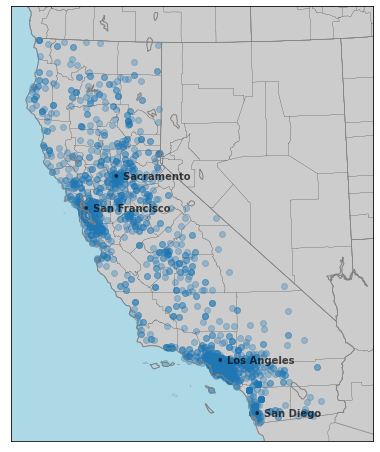

In [6]:
fig , ax= plt.subplots(figsize=(8, 8))

m = Basemap(projection='lcc', resolution='i', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6, ax=ax)

m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawlsmask(ocean_color='lightblue')
m.drawcounties()

x, y = m(-117.16,32.71)
m.ax.annotate('• San Diego', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)
x, y = m(-121.49,38.58)
m.ax.annotate(f'• Sacramento', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)
x, y = m(-118.24,34.05)
m.ax.annotate(f'• Los Angeles', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)
x, y = m(-122.41,37.77)
m.ax.annotate(f'• San Francisco', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)

lat = churned_users['Latitude'].values
lon = churned_users['Longitude'].values

m.scatter(lon, lat, latlon=True,
        alpha=0.3)

In [7]:
# Esto era para otro grafico que no se termino usando pero sigue siendo util.

def plot_scatter_map(df, alpha=0.7, title='', ax=None , marcar_ciudades=True):
  '''
  Dibuja un scatter con el mapa de california
  Parametros:
  df: el dataframe ya filtrado (usa la latitud y longitud)
  alpha: transparencia de los puntitos. Por defecto es 0.7
  title: titulo del grafico (requiere pasar ax)
  ax: el axis de matplotlib
  marcar_ciudades: si es igual a True marca las ciudades de Sacramento, San Fracisco 
  ,Los Angeles y San Diego (True por defecto, requiere pasar ax)

  Ejemplo:
  
  fig , ax = plt.subplots(figsize=(8,8))

  cond = churned_users['Churn Reason']==reason
  temp_df = churned_users.loc[cond]

  cantidad_razones = churned_users['Churn Reason'].value_counts()

  title = reason + f' ({cantidad_razones[reason]})'

  plot_scatter_map(temp_df, ax=ax, title=title)
  
  retorna==>> dibuja el mapa la ubicacion de las lineas del dataframe seleccionadas.
  '''
  m = Basemap(projection='lcc', resolution='c', 
              lat_0=37.5, lon_0=-119,
              width=1E6, height=1.2E6, ax=ax)

  m.drawcoastlines(color='gray')
  m.drawcountries(color='gray')
  m.drawstates(color='gray')
  m.drawlsmask(ocean_color='lightblue')

  lat = df['Latitude'].values
  lon = df['Longitude'].values

  if marcar_ciudades and m.ax:
    
    cond = churn_ds['Churn Reason']==reason
    
    san_diego_amt = len(churned_users.loc[(churned_users['Churn Reason']==reason) & (churned_users['City'] == 'San Diego')])
    san_francisco_amt = len(churned_users.loc[(churned_users['Churn Reason']==reason) & (churned_users['City'] == 'San Francisco')])
    los_angeles_amt = len(churned_users.loc[(churned_users['Churn Reason']==reason) & (churned_users['City'] == 'Los Angeles')])
    sacramento_amt = len(churned_users.loc[(churned_users['Churn Reason']==reason) & (churned_users['City'] == 'Sacramento')])
    

    x, y = m(-117.16,32.71)
    m.ax.annotate('• San Diego \n'+' '*10+f'({san_diego_amt})', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)
    x, y = m(-121.49,38.58)
    m.ax.annotate(f'• Sacramento ({sacramento_amt})', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)
    x, y = m(-118.24,34.05)
    m.ax.annotate(f'• Los Angeles ({los_angeles_amt})', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)
    x, y = m(-122.41,37.77)
    m.ax.annotate(f'• San Francisco ({san_francisco_amt})', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data',fontsize='medium',fontweight='bold',alpha=0.7)

  m.ax.set_title(title)
  m.scatter(lon, lat, latlon=True,
          alpha=alpha)

In [8]:
churned_users['Churn Reason'].isna().sum()

0

In [9]:
len(churned_users['Churn Reason'].unique())

20

In [10]:
#hago esto no solo para ver cuales son las principales razones, sino tambien para que me los acomode de mayor a menor para cuando genere el grafico.
# cantidad_razones = churned_users['Churn Reason'].value_counts()
# cantidad_razones_df = pd.DataFrame(cantidad_razones).reset_index()
# cantidad_razones_df.rename(columns = {'Churn Reason': 'cantidad','index': 'Churn Reason'}, inplace = True)
# cantidad_razones_df
# Esto era para otro grafico que no se termino usando.

In [11]:
# ROWS, COLS = 4, 5
# fig, ax = plt.subplots(ROWS, COLS, figsize=(24, 24))
# row, col = 0, 0

# for i, reason in enumerate(cantidad_razones_df['Churn Reason'].unique()):
#   if col == COLS - 1:
#       row += 1
#   col = i % COLS

#   cond = churned_users['Churn Reason']==reason
#   temp_df = churned_users.loc[cond]
#   title = reason + f' ({cantidad_razones[reason]})'
#   plot_scatter_map(temp_df, ax=ax[row, col], title=title)

In [12]:
# Esto era para un grafico de guía.

# ciudades_df = pd.DataFrame(top_churned_cities).reset_index()
# ciudades_df.rename(columns = {'City': 'cantidad','index': 'City'}, inplace = True)

# g = sns.catplot(x='cantidad',
#             y='City',
#             data=ciudades_df.iloc[:6],
#             kind='bar',
#             ci=None,
#             aspect=2);
# g.set(title='Cantidad de churned por ciudad',ylabel='Ciudad',xlabel='N° de Churned')

# 2. Ubicación precisa de las zonas con mas churned.(matplotlib)



In [13]:
churn_ds.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [14]:
cond = churned_users['City']=='San Diego'
churned_users[cond]['Churn Reason'].value_counts()

Competitor made better offer        146
Don't know                           15
Attitude of support person            8
Competitor had better devices         6
Attitude of service provider          2
Long distance charges                 2
Product dissatisfaction               2
Poor expertise of online support      2
Lack of self-service on Website       1
Network reliability                   1
Name: Churn Reason, dtype: int64

In [15]:
#Checkeo los % que representan cada ciudad en el total de los churned
top_churned_cities/sum(top_churned_cities) * 100

San Diego         9.898341
Los Angeles       4.173355
San Francisco     1.658641
San Jose          1.551632
Sacramento        1.391118
                    ...   
Imperial Beach    0.053505
San Bruno         0.053505
Fields Landing    0.053505
El Sobrante       0.053505
King City         0.053505
Name: City, Length: 777, dtype: float64

In [16]:
sum(top_churned_cities[:100]/sum(top_churned_cities)) *100

47.19101123595506

In [17]:
len(churned_users),sum(top_churned_cities)

(1869, 1869)

Como las ciudades en si tienen muy poco % de representación y en el scatter se 
muestra que hay valores cercanos a ellas que no son de las ciudades 
voy a segmentar los churned por los condados mas poblados a los cuales pertenecen las ciudades en las que estan para tratar de tener una cantidad representativa.

In [18]:
# las listas de las ciudades por condado las saque googleando

#https://geographic.org/streetview/usa/ca/san_diego/index.html
condado_san_diego = 'Alpine, Bonita, Bonsall, Borrego Springs, Boulevard, Camp Pendleton, Campo, Cardiff By The Sea, Carlsbad, Chula Vista, Coronado, Del Mar, Descanso, Dulzura, El Cajon, Encinitas, Escondido, Fallbrook, Guatay, Imperial Beach, Jacumba, Jamul, Julian, La Jolla, La Mesa, Lakeside, Lemon Grove, Mount Laguna, National City, Oceanside, Pala, Palomar Mountain, Pauma Valley, Pine Valley, Potrero, Poway, Ramona, Ranchita, Rancho Santa Fe, San Diego, San Luis Rey, San Marcos, San Ysidro, Santa Ysabel, Santee, Solana Beach, Spring Valley, Tecate, Valley Center, Vista, Warner Springs'
condado_san_diego = condado_san_diego.split(', ')

#https://geographic.org/streetview/usa/ca/los_angeles/index.html
condado_los_angeles = 'Acton, Agoura Hills, Alhambra, Altadena, Arcadia, Artesia, Avalon, Azusa, Baldwin Park, Bell Gardens, Bellflower, Beverly Hills, Burbank, Calabasas, Canoga Park, Canyon Country, Carson, Castaic, Cerritos, Chatsworth, Claremont, Compton, Covina, Culver City, Diamond Bar, Downey, Duarte, El Monte, El Segundo, Encino, Gardena, Glendale, Glendora, Granada Hills, Hacienda Heights, Harbor City, Hawaiian Gardens, Hawthorne, Hermosa Beach, Huntington Park, Inglewood, La Canada Flintridge, La Crescenta, La Mirada, La Puente, La Verne, Lake Hughes, Lakewood, Lancaster, Lawndale, Littlerock, Llano, Lomita, Long Beach, Los Angeles, Lynwood, Malibu, Manhattan Beach, Marina Del Rey, Maywood, Mission Hills, Monrovia, Montebello, Monterey Park, Montrose, Mount Wilson, Newhall, North Hills, North Hollywood, Northridge, Norwalk, Pacific Palisades, Pacoima, Palmdale, Palos Verdes Peninsula, Panorama City, Paramount, Pasadena, Pearblossom, Pico Rivera, Playa Del Rey, Playa Vista, Pomona, Porter Ranch, Rancho Palos Verdes, Redondo Beach, Reseda, Rosemead, Rowland Heights, San Dimas, San Fernando, San Gabriel, San Marino, San Pedro, Santa Clarita, Santa Fe Springs, Santa Monica, Sherman Oaks, Sierra Madre, Signal Hill, South El Monte, South Gate, South Pasadena, Stevenson Ranch, Studio City, Sun Valley, Sunland, Sylmar, Tarzana, Temple City, Topanga, Torrance, Tujunga, Valencia, Valley Village, Valyermo, Van Nuys, Venice, Verdugo City, Walnut, West Covina, West Hills, West Hollywood, Whittier, Wilmington, Winnetka, Woodland Hills'
condado_los_angeles = condado_los_angeles.split(', ')

#https://geographic.org/streetview/usa/ca/san_francisco/index.html
condado_san_francisco = ['San Francisco']

#https://geographic.org/streetview/usa/ca/sacramento/index.html
condado_sacramento = 'Antelope, Carmichael, Citrus Heights, Courtland, Elk Grove, Elverta, Fair Oaks, Folsom, Galt, Herald, Hood, Isleton, Mather, Mcclellan, North Highlands, Orangevale, Rancho Cordova, Rio Linda, Ryde, Sacramento, Sloughhouse, Walnut Grove, Wilton'
condado_sacramento = condado_sacramento.split(', ')

#https://geographic.org/streetview/usa/ca/santa_clara/index.html  (San jose se encuentra en este condado)
condado_santa_clara = 'Alviso, Campbell, Coyote, Cupertino, Gilroy, Holy City, Los Altos, Los Gatos, Milpitas, Morgan Hill, Mount Hamilton, Mountain View, Palo Alto, Redwood Estates, San Jose, San Martin, Santa Clara, Saratoga, Stanford, Sunnyvale'
condado_santa_clara = condado_santa_clara.split(', ')

#el top 5 solo me daba 40% de los churned, agrego mas condados.

#https://geographic.org/streetview/usa/ca/riverside/index.html
condado_riverside = 'Aguanga, Anza, Banning, Beaumont, Blythe, Cabazon, Calimesa, Cathedral City, Coachella, Corona, Desert Center, Desert Hot Springs, Hemet, Homeland, Idyllwild, Indian Wells, Indio, La Quinta, Lake Elsinore, Mecca, Menifee, Mira Loma, Moreno Valley, Mountain Center, Murrieta, Norco, North Palm Springs, Nuevo, Palm Desert, Palm Springs, Perris, Quail Valley, Rancho Mirage, Riverside, San Jacinto, Sun City, Temecula, Thermal, Thousand Palms, Whitewater, Wildomar, Winchester'
condado_riverside = condado_riverside.split(', ')

#https://geographic.org/streetview/usa/ca/alameda/index.html
condado_alameda = 'Alameda, Albany, Berkeley, Castro Valley, Dublin, Emeryville, Fremont, Hayward, Livermore, Newark, Oakland, Pleasanton, San Leandro, San Lorenzo, Sunol, Union City'
condado_alameda = condado_alameda.split(', ')

#https://geographic.org/streetview/usa/ca/fresno/index.html
condado_fresno = 'Auberry, Big Creek, Biola, Burrel, Cantua Creek, Caruthers, Clovis, Coalinga, Del Rey, Dunlap, Firebaugh, Five Points, Fowler, Fresno, Friant, Helm, Hume, Huron, Kerman, Kingsburg, Lakeshore, Laton, Mendota, Miramonte, Mono Hot Springs, Orange Cove, Parlier, Piedra, Prather, Raisin City, Reedley, Riverdale, San Joaquin, Sanger, Selma, Shaver Lake, Squaw Valley, Tollhouse, Tranquillity'
condado_fresno = condado_fresno.split(', ')

#https://geographic.org/streetview/usa/ca/orange/index.html
condado_orange = 'Aliso Viejo, Anaheim, Brea, Buena Park, Capistrano Beach, Corona Del Mar, Costa Mesa, Cypress, Dana Point, Foothill Ranch, Fountain Valley, Fullerton, Garden Grove, Huntington Beach, Irvine, La Habra, La Palma, Ladera Ranch, Laguna Beach, Laguna Hills, Laguna Niguel, Laguna Woods, Lake Forest, Los Alamitos, Midway City, Mission Viejo, Newport Beach, Newport Coast, Orange, Placentia, Rancho Santa Margarita, San Clemente, San Juan Capistrano, Santa Ana, Seal Beach, Silverado, Stanton, Sunset Beach, Surfside, Trabuco Canyon, Tustin, Villa Park, Westminster, Yorba Linda'
condado_orange = condado_orange.split(', ')

#https://geographic.org/streetview/usa/ca/san_bernardino/index.html
condado_san_bernandino = 'Adelanto, Amboy, Angelus Oaks, Apple Valley, Baker, Barstow, Big Bear City, Big Bear Lake, Bloomington, Blue Jay, Bryn Mawr, Cedar Glen, Cedarpines Park, Chino, Chino Hills, Cima, Colton, Crestline, Daggett, Earp, Essex, Fawnskin, Fontana, Forest Falls, Fort Irwin, Grand Terrace, Green Valley Lake, Guasti, Helendale, Hesperia, Highland, Hinkley, Joshua Tree, Lake Arrowhead, Landers, Loma Linda, Lucerne Valley, Ludlow, Lytle Creek, Mentone, Montclair, Morongo Valley, Mountain Pass, Mt Baldy, Needles, Newberry Springs, Nipton, Ontario, Oro Grande, Parker Dam, Phelan, Pinon Hills, Pioneertown, Rancho Cucamonga, Redlands, Rialto, Rimforest, Running Springs, San Bernardino, Skyforest, Sugarloaf, Trona, Twentynine Palms, Twin Peaks, Upland, Victorville, Vidal, Wrightwood, Yermo, Yucaipa, Yucca Valley'
condado_san_bernandino = condado_san_bernandino.split(', ')

#top 10 me daba 57%, quiero aprox 70%

#https://geographic.org/streetview/usa/ca/contra_costa/index.html
condado_contra_costa = 'Alamo, Antioch, Bethel Island, Brentwood, Byron, Canyon, Clayton, Concord, Crockett, Danville, Diablo, Discovery Bay, El Cerrito, El Sobrante, Hercules, Knightsen, Lafayette, Martinez, Moraga, Oakley, Orinda, Pinole, Pittsburg, Pleasant Hill, Port Costa, Richmond, Rodeo, San Pablo, San Ramon, Walnut Creek'
condado_contra_costa = condado_contra_costa.split(', ')

#https://geographic.org/streetview/usa/ca/kern/index.html
condado_kern = 'Arvin, Bakersfield, Bodfish, Boron, Buttonwillow, Caliente, California City, Cantil, Delano, Edison, Edwards, Fellows, Frazier Park, Glennville, Inyokern, Johannesburg, Keene, Kernville, Lake Isabella, Lamont, Lebec, Lost Hills, Maricopa, Mc Farland, Mc Kittrick, Mojave, Onyx, Pine Mountain Club, Randsburg, Red Mountain, Ridgecrest, Rosamond, Shafter, Taft, Tehachapi, Tupman, Wasco, Weldon, Wofford Heights, Woody'
condado_kern = condado_kern.split(', ')

#https://geographic.org/streetview/usa/ca/ventura/index.html
condado_ventura = 'Camarillo, Fillmore, Moorpark, Newbury Park, Oak Park, Oak View, Ojai, Oxnard, Piru, Port Hueneme, Santa Paula, Simi Valley, Somis, Thousand Oaks, Ventura, Westlake Village'
condado_ventura = condado_ventura.split(', ')

#https://geographic.org/streetview/usa/ca/san_mateo/index.html
condado_san_mateo = 'Atherton, Belmont, Brisbane, Burlingame, Daly City, El Granada, Half Moon Bay, La Honda, Loma Mar, Menlo Park, Millbrae, Montara, Moss Beach, Pacifica, Pescadero, Portola Valley, Redwood City, San Bruno, San Carlos, San Francisco, San Gregorio, San Mateo, South San Francisco'
condado_san_mateo = condado_san_mateo.split(', ')

#https://geographic.org/streetview/usa/ca/san_joaquin/index.html
condado_san_joaquin = 'Acampo, Clements, Escalon, Farmington, French Camp, Holt, Lathrop, Linden, Lockeford, Lodi, Manteca, Ripon, Stockton, Thornton, Tracy, Vernalis, Victor, Woodbridge'
condado_san_joaquin = condado_san_joaquin.split(', ')



In [19]:
# me quedo con el top 15 (66%), si bien no es, es una cantidad representativa. 
# Cada condado que agregaba demas me estaba dando muy poco % de representacion e iba a terminar con demaciadas clases.
top_15_condados = condado_san_diego + condado_los_angeles + condado_san_francisco + condado_sacramento + condado_santa_clara + condado_riverside + condado_alameda + condado_fresno + condado_orange + condado_san_bernandino + condado_contra_costa + condado_kern + condado_ventura +condado_san_mateo + condado_san_joaquin
len(top_15_condados)

561

In [20]:
cond = churned_users['City'].isin(top_15_condados)
temp_df = churned_users.loc[cond].copy()
print(len(temp_df)/len(churned_users)*100)

66.29213483146067


In [21]:
def get_county(value):
  if value in condado_san_diego:
    return 'San Diego'
  elif value in condado_los_angeles:
    return 'Los Angeles'
  elif value in condado_sacramento:
    return 'Sacramento'
  elif value in condado_san_francisco:
    return 'San Francisco'
  elif value in condado_santa_clara:
    return 'Santa Clara'
  elif value in condado_riverside:
    return 'Riverside'
  elif value in condado_alameda:
    return 'Alameda'
  elif value in condado_fresno:
    return 'Fresno'
  elif value in condado_orange:
    return 'Orange'
  elif value in condado_san_bernandino:
    return 'San Bernandino'
  elif value in condado_contra_costa:
    return 'Contra Costa'
  elif value in condado_kern:
    return 'Kern'
  elif value in condado_ventura:
    return 'Ventura'
  elif value in condado_san_mateo:
    return 'San Mateo'
  elif value in condado_san_joaquin:
    return 'San Joaquin'
  else:
    print(f'No se pudo sacar el condado de {value}')


In [22]:
temp_df['County'] = temp_df['City'].apply(get_county)

In [23]:
temp_df[['County','City']]

,County,City
2,Orange,Costa Mesa
3,Contra Costa,Martinez
4,Ventura,Camarillo
18,San Mateo,Daly City
19,Santa Clara,Morgan Hill
...,...,...
7007,Orange,Sunset Beach
7012,Los Angeles,Covina
7020,Riverside,Desert Center
7036,Fresno,Hume


In [24]:
top_churned_counties = temp_df['County'].value_counts()
top_churned_counties

Los Angeles       344
San Diego         260
Orange             83
Riverside          82
San Bernandino     64
Sacramento         59
Santa Clara        56
Alameda            50
Fresno             49
Contra Costa       41
Kern               36
San Francisco      31
San Joaquin        29
San Mateo          28
Ventura            27
Name: County, dtype: int64

In [25]:
representation_of_county = top_churned_counties/len(churned_users) *100
representation_of_county

Los Angeles       18.405564
San Diego         13.911182
Orange             4.440877
Riverside          4.387373
San Bernandino     3.424291
Sacramento         3.156768
Santa Clara        2.996255
Alameda            2.675227
Fresno             2.621723
Contra Costa       2.193686
Kern               1.926164
San Francisco      1.658641
San Joaquin        1.551632
San Mateo          1.498127
Ventura            1.444623
Name: County, dtype: float64

In [26]:
sum(top_churned_counties)/len(churned_users) * 100

66.29213483146067

Los condados con mas churned son San Diego y Los Angeles, representando 30% aprox del total de churned.

Los top 15 condados en churned representan 66.29% del total, decidí no seguir agregando ya que cada condado que agregaba me estaba dando cada vez menos % del total

In [27]:
representation_of_city = top_churned_cities/len(churned_users) * 100
representation_of_city

San Diego         9.898341
Los Angeles       4.173355
San Francisco     1.658641
San Jose          1.551632
Sacramento        1.391118
                    ...   
Imperial Beach    0.053505
San Bruno         0.053505
Fields Landing    0.053505
El Sobrante       0.053505
King City         0.053505
Name: City, Length: 777, dtype: float64

In [28]:
sum(representation_of_city[:100])

47.191011235955045

In [29]:
representation_of_city_rounded = round(representation_of_city,2)
representation_of_city_rounded

San Diego         9.90
Los Angeles       4.17
San Francisco     1.66
San Jose          1.55
Sacramento        1.39
                  ... 
Imperial Beach    0.05
San Bruno         0.05
Fields Landing    0.05
El Sobrante       0.05
King City         0.05
Name: City, Length: 777, dtype: float64

## ¿Que condados tienen mas churned y cuanto % del total tienen? 

Veamos cuales son los condados a donde tendriamos que estar prestandole atención.

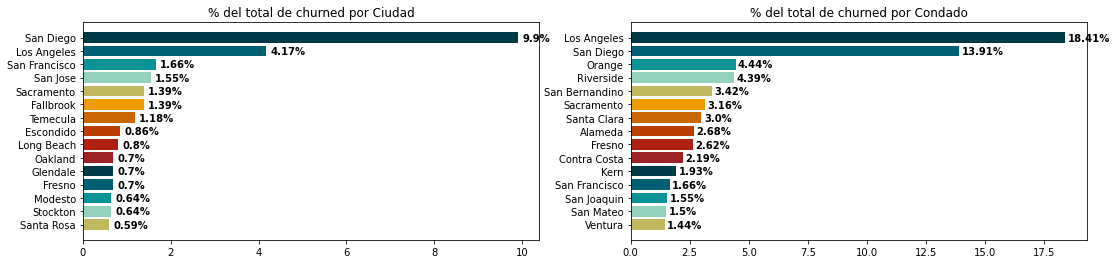

In [30]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
ax=ax.flatten()

colors = ['#003946', '#005f73', '#0a9396', '#94d2bd', '#c1b75f', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']

ax[0].barh(representation_of_city.index[:15],representation_of_city[:15],color=colors)
ax[0].set_title('% del total de churned por Ciudad')
ax[0].invert_yaxis()
for i, v in enumerate(round(representation_of_city[:15],2).values):
    ax[0].text(v+.1, i + .25, str(v)+'%', fontweight='bold')

ax[1].set_title('% del total de churned por Condado')
ax[1].barh(representation_of_county.index[:15],representation_of_county[:15],color=colors)
ax[1].invert_yaxis()
for i, v in enumerate(round(representation_of_county[:15],2).values):
    ax[1].text(v+.1, i + .25, str(v)+'%', fontweight='bold')

Podemos ver que las ciudades y condados con mas churned son San Diego y Los Angeles.Teniendo estos condados al rededor del 30% del total de los churned juntos.

# 3. Distribución de las razones de churn por condado en % (seaborn)

In [31]:
temp_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,County
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices,Orange
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,Contra Costa
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,Ventura
18,0022-TCJCI,Male,79,No,0,Daly City,94015,37.680844,-122.481310,0,45,None,Yes,10.67,No,Yes,DSL,17.0,Yes,No,Yes,No,No,Yes,No,Yes,One Year,No,Credit Card,62.7,2791.50,0.0,0,480.15,3271.65,Churned,Dissatisfaction,Limited range of services,San Mateo
19,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.1,25.10,0.0,0,0.00,25.10,Churned,Competitor,Competitor made better offer,Santa Clara


In [32]:
#Calculo los % por categoria y los sorteo en el orden de sorter que es el orden por cantidad de churned en los condados de mayor a menor.
cond = (temp_df['Churn Reason'] != 'Moved') & (temp_df['Churn Reason'] != 'Deceased') & (temp_df['Churn Reason'] !="Don't know")

distribution = pd.crosstab(temp_df[cond]['County'], temp_df[cond]['Churn Reason'], normalize='index')  #me da un stack en 2d
distribution = distribution.stack().reset_index(name='%') #lo hace 1 dimención

#Sorting

sorter = ['Los Angeles', 'San Diego', 'Orange', 'Riverside',
       'San Bernandino', 'Sacramento', 'Santa Clara', 'Alameda', 'Fresno',
       'Contra Costa', 'Kern', 'San Francisco', 'San Joaquin',
       'San Mateo', 'Ventura']

#cambio el tipo de la columna a categoria para poder sortearla
distribution.County = distribution.County.astype("category")
distribution.County.cat.set_categories(sorter, inplace=True)
distribution.sort_values(['County','Churn Reason'], inplace = True,ascending=(True,True))

#devuelvo al tipo que era antes para seguir usandola
distribution.County = distribution.County.astype("object")

#convierto los valores a % de 2 decimales
distribution['%'] = distribution['%'] * 100

distribution

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


,County,Churn Reason,%
68,Los Angeles,Attitude of service provider,1.960784
69,Los Angeles,Attitude of support person,20.915033
70,Los Angeles,Competitor had better devices,18.954248
71,Los Angeles,Competitor made better offer,5.228758
72,Los Angeles,Competitor offered higher download speeds,6.209150
...,...,...,...
250,Ventura,Poor expertise of online support,0.000000
251,Ventura,Poor expertise of phone support,0.000000
252,Ventura,Price too high,4.166667
253,Ventura,Product dissatisfaction,4.166667


In [33]:
distribution['Churn Reason'].unique()

array(['Attitude of service provider', 'Attitude of support person',
       'Competitor had better devices', 'Competitor made better offer',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Extra data charges',
       'Lack of affordable download/upload speed',
       'Lack of self-service on Website', 'Limited range of services',
       'Long distance charges', 'Network reliability',
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction'], dtype=object)

In [34]:
#Uso una paleta custom porque las que venian con seaborn no me daban el contraste correcto para ver con facilidad la distribucion, mas que nada es por la cantidad de clases.
#No incluyo las razones Moved, Don't known, Deceased porque son cosas que no se pueden controlar y porque quiero simplificar lo mas posible el grafico.

colors =['#5B4144','#8C4F47',  #attitude
         '#EE6C4D','#ED7E63','#EB9079','#E7B4A5', #competitor
         '#3D5A80','#436186','#547497','#82A8C3','#A1C9DE','#BCDEEB','#ADF3F5','#7AEAEE','#4D7E9C','#5CA2B7','#59BBDC' #servicio/misc
         ]
print(len(colors))
sns.color_palette(colors)

17


[(0.3568627450980392, 0.2549019607843137, 0.26666666666666666),
 (0.5490196078431373, 0.30980392156862746, 0.2784313725490196),
 (0.9333333333333333, 0.4235294117647059, 0.30196078431372547),
 (0.9294117647058824, 0.49411764705882355, 0.38823529411764707),
 (0.9215686274509803, 0.5647058823529412, 0.4745098039215686),
 (0.9058823529411765, 0.7058823529411765, 0.6470588235294118),
 (0.23921568627450981, 0.35294117647058826, 0.5019607843137255),
 (0.2627450980392157, 0.3803921568627451, 0.5254901960784314),
 (0.32941176470588235, 0.4549019607843137, 0.592156862745098),
 (0.5098039215686274, 0.6588235294117647, 0.7647058823529411),
 (0.6313725490196078, 0.788235294117647, 0.8705882352941177),
 (0.7372549019607844, 0.8705882352941177, 0.9215686274509803),
 (0.6784313725490196, 0.9529411764705882, 0.9607843137254902),
 (0.47843137254901963, 0.9176470588235294, 0.9333333333333333),
 (0.30196078431372547, 0.49411764705882355, 0.611764705882353),
 (0.3607843137254902, 0.6352941176470588, 0.7176470588235294),
 (0.34901960784313724, 0.7333333333333333, 0.8627450980392157)]

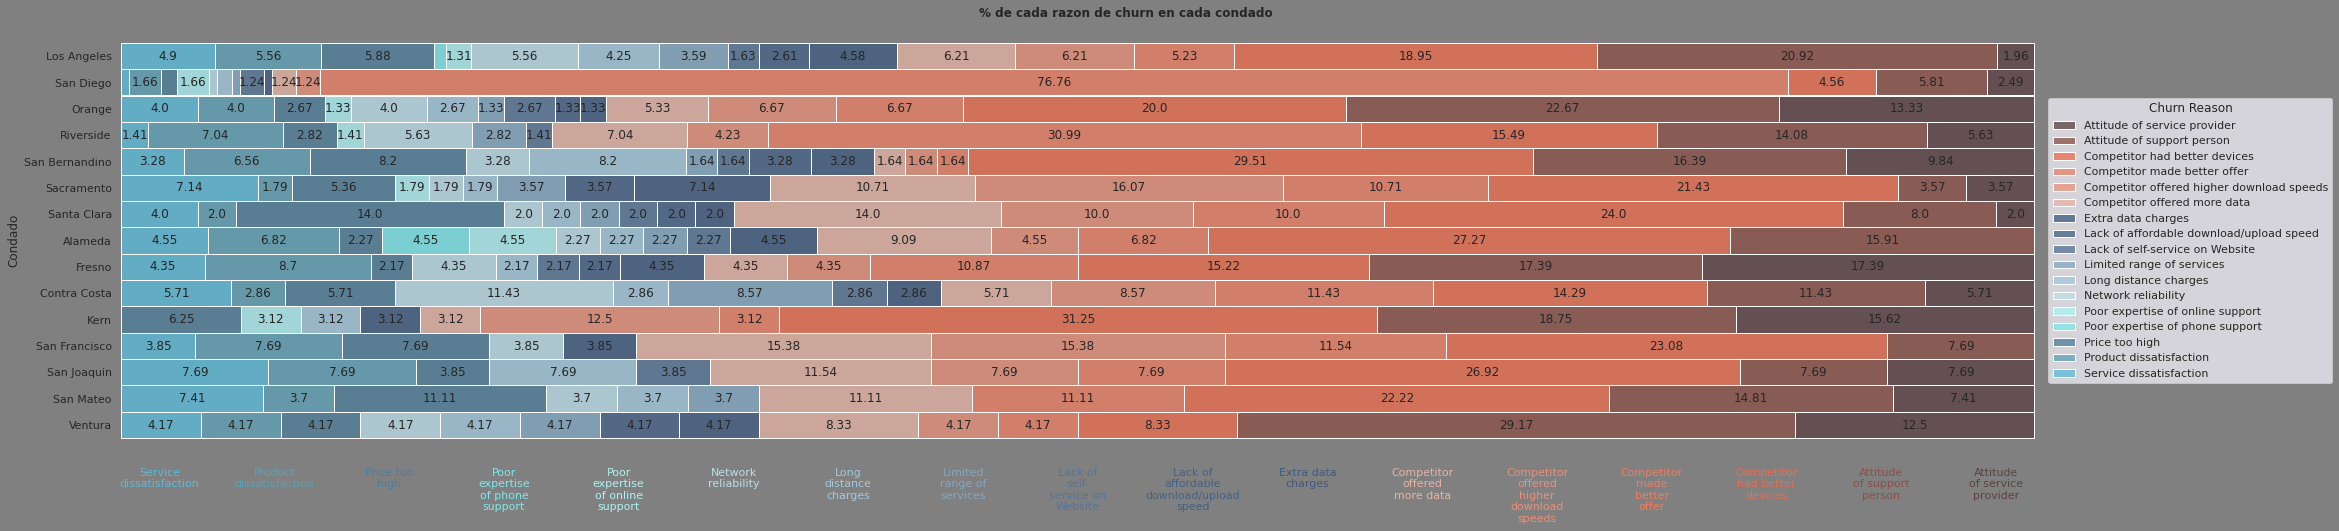

In [35]:
GRAFICO_A_COLOR = True


#para centrar los xticks ya que si los rotaba quedaban mal.
import textwrap

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

#colores del grafico, mas que nada para el fondo ya que interferia con el color de lox xticks
sns.set_style("dark")
sns.set(rc={'figure.facecolor':'gray','figure.facecolor':'gray'})


fig,ax=plt.subplots(1,1,figsize=(36,8))

g = sns.histplot(data= distribution,
            y='County', hue='Churn Reason',weights='%',
            palette = sns.color_palette(colors,desat=GRAFICO_A_COLOR),
            legend=True,
            multiple = 'stack',
           )

#pongo los % en las cajas con mas de 1.2%
for c in g.containers:
    labels = [round(v.get_width(),2) if v.get_width() > 1.2 else '' for v in c]
    g.bar_label(c, labels=labels, label_type='center')


g.set_title('% de cada razon de churn en cada condado',fontdict={
 'fontweight': 'bold',
})

g.set_ylabel('Condado')
#cambio los ticks numericos por las clases para tener una referencia de donde esta 
#cada razon.
g.set_xlabel('')
g.set_xticks(range(2,100,6),labels=distribution['Churn Reason'].unique()[::-1],rotation=0)

wrap_labels(ax, 10)

#les pongo el color para que ayude a referenciar con el color de cada caja
for i,tick_label in enumerate(g.axes.get_xticklabels()):
    tick_label.set_color(sns.color_palette(colors,desat=GRAFICO_A_COLOR)[-1::-1][i])

#quito unas partes blancas que habian quedado y los ejes
g.set_facecolor('gray')
g.grid(visible=False)
sns.despine(left=True,bottom=True)

#acomodo la leyenda a la derecha por fuera del grafico
sns.move_legend(ax,bbox_to_anchor=(1.03, 0.5),loc=10)

plt.show()

comentario: el grafico este me aporto muchisima informacion decidi resumirla porque si me iba condado por condado me iba por las ramas.

## ¿Que razones predominan en los 15 condados mas poblados del estado?
(excluyendo mudanzas, fallecimientos y razones desconocidas)

* ### **Resumen**: 
 * **La competencia es la razon principal** de los churned en los condados representando en general 30-70% de los churned.Los unicos condados donde no es la principal son Fresno, Orange y Ventura donde estan empatados o superados por probelmas en la actitud del soporte.
>
En la mayoria de los condados ,entre las razones de la competencia, predomina que ofrece mejores dispositivos. La excepcion a esto es San Diego donde domina la mejor oferta por parte de los competidores.
>
 * **La razon secundaria es la actitud del soporte y del proveedor** de cada condado representando en general 15-35% de los churned.Se puede observar en Fresno, Orange, Kern, Ventura y San Bernandino como los principales con este problema y San Diego, San Francisco y Sacramento donde este problema es minimo
>
 * **Y las razones terciarias** son disatisfaccion con los productos,servicios y los precios tanto del servicio como de los cargos a larga distancia.
>
Este problema representa aproximadamente 15-30% de los churned en cada condado. En los unicos en los que no se presenta a gran tamaño es en San Diego y Kern y
en los que peor impactan estas razones son Los Angeles, Contra Costa y San Bernandino.


In [36]:
#reseteo los estilos de seaborn
sns.set_style("white")

# 4. Balanceando el dataset

Quiero comparar los clientes que siguen en el servicio con los que lo dejaron.

Como tengo muchos mas stayed que churned en el dataset no puedo compararlos directamente ya que siempre va a haber mas stayed que churned.

Decidi balancear el dataset por medio de oversampling usando **SMOTENC** de la libreria **imblearn** ya que si bien era mas facil tomar una muestra al azar ,del tamaño de los churned, de los stayed podria estar perdiendo datos valiosos en especial siendo que el dataset no es excesivamente grande para este problema como para considerarlo.

In [37]:
churn_ds.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [38]:
stayed_users =  churn_ds.loc[churn_ds['Customer Status']=='Stayed']

churned_stayed_df = pd.concat([churned_users,stayed_users]).reset_index(drop=True).copy()

In [39]:
churned_stayed_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
1,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
2,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
3,0022-TCJCI,Male,79,No,0,Daly City,94015,37.680844,-122.481310,0,45,None,Yes,10.67,No,Yes,DSL,17.0,Yes,No,Yes,No,No,Yes,No,Yes,One Year,No,Credit Card,62.7,2791.50,0.0,0,480.15,3271.65,Churned,Dissatisfaction,Limited range of services
4,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.1,25.10,0.0,0,0.00,25.10,Churned,Competitor,Competitor made better offer


In [40]:
#quito columnas de metadatos y las que no me sirvan para la siguiente parte
churned_stayed_df.drop(['Customer ID','Zip Code','Churn Category','Churn Reason'],axis=1,inplace=True)

In [41]:
churned_stayed_df.head()

,Gender,Age,Married,Number of Dependents,City,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Male,50,No,0,Costa Mesa,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.0,0,134.60,415.45,Churned
1,Male,78,Yes,0,Martinez,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.0,0,361.66,1599.51,Churned
2,Female,75,Yes,0,Camarillo,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.0,0,22.14,289.54,Churned
3,Male,79,No,0,Daly City,37.680844,-122.481310,0,45,None,Yes,10.67,No,Yes,DSL,17.0,Yes,No,Yes,No,No,Yes,No,Yes,One Year,No,Credit Card,62.7,2791.50,0.0,0,480.15,3271.65,Churned
4,Male,67,No,0,Morgan Hill,37.161544,-121.649371,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.1,25.10,0.0,0,0.00,25.10,Churned


In [42]:
#guardo el indice de las categoricas porque lo tengo que usar para hacer oversampling
categorical_idx = []
for i,col in enumerate(churned_stayed_df.columns):
  if churned_stayed_df[col].dtypes.str=='|O':
    categorical_idx.append(i)
    print(f'{col}: {i}')
categorical_idx

Gender: 0
Married: 2
City: 4
Offer: 9
Phone Service: 10
Multiple Lines: 12
Internet Service: 13
Internet Type: 14
Online Security: 16
Online Backup: 17
Device Protection Plan: 18
Premium Tech Support: 19
Streaming TV: 20
Streaming Movies: 21
Streaming Music: 22
Unlimited Data: 23
Contract: 24
Paperless Billing: 25
Payment Method: 26
Customer Status: 33


[0, 2, 4, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 33]

In [43]:
churned_stayed_df.isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     644
Multiple Lines                        644
Internet Service                        0
Internet Type                        1344
Avg Monthly GB Download              1344
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                         1344
Streaming Movies                     1344
Streaming Music                      1344
Unlimited Data                    

In [44]:
#por info del dataset en teoria las columnas con nulos se deben a que no tenian el servicio. verifico
cond = (churned_stayed_df['Phone Service']=='Yes')
churned_stayed_df[cond][['Avg Monthly Long Distance Charges','Multiple Lines']].isna().sum()


Avg Monthly Long Distance Charges    0
Multiple Lines                       0
dtype: int64

In [45]:
churned_stayed_df[cond][['Avg Monthly Long Distance Charges','Multiple Lines']].dtypes

Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
dtype: object

In [46]:
churned_stayed_df[cond][['Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']].dtypes

Internet Type               object
Avg Monthly GB Download    float64
Online Security             object
Online Backup               object
Device Protection Plan      object
Premium Tech Support        object
Streaming TV                object
Streaming Movies            object
Streaming Music             object
Unlimited Data              object
dtype: object

In [47]:
cond = (churned_stayed_df['Internet Service']=='Yes')
churned_stayed_df[cond][['Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']].isna().sum()

Internet Type              0
Avg Monthly GB Download    0
Online Security            0
Online Backup              0
Device Protection Plan     0
Premium Tech Support       0
Streaming TV               0
Streaming Movies           0
Streaming Music            0
Unlimited Data             0
dtype: int64

### Lleno nulos para poder pasarlo por SMOTENC

In [48]:
#Ok se verifica relleno los nulos con lo que me parece correcto Numericas -> 0 , Categoricas -> No (como son todas binarias y no tienen el servicio es lo q me parece mas correcto)
#en el caso de Internet type decido llenarlo tambien con No ya que quedaria diferenciado de los otros tipos como un "No tiene" y para el uso de los ejercicios creo que es mas que suficiente.
categorical_cols=['Multiple Lines','Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']

numerical_cols=['Avg Monthly GB Download','Avg Monthly Long Distance Charges']

for col in categorical_cols:
  churned_stayed_df[col].fillna('No',inplace=True)
for col in numerical_cols:
  churned_stayed_df[col].fillna(0,inplace=True)

churned_stayed_df.isna().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing        

In [49]:
y = churned_stayed_df.pop('Customer Status')
X = churned_stayed_df

### Balanceo el dataset

In [50]:
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features=categorical_idx[0:len(categorical_idx)-1],sampling_strategy='minority', random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

len(X_resampled),len(y_resampled),len(churned_stayed_df),len(churned_users),len(stayed_users)

(9440, 9440, 6589, 1869, 4720)

In [51]:
balanced_df = pd.concat([X_resampled,y_resampled],axis=1)

In [52]:
#verifico
len(balanced_df.loc[balanced_df['Customer Status']=='Stayed']), len(balanced_df.loc[balanced_df['Customer Status']=='Churned'])

(4720, 4720)

# 5. Comparacion churned vs stayed en columnas numericas(seaborn)

In [53]:
categorical_cols=[]
numerical_cols=[]

for col in balanced_df.columns:
  if balanced_df[col].dtypes.str=='|O':
    categorical_cols.append(col)
  else:
    numerical_cols.append(col)

print(f'Categorical:\n{categorical_cols}\nNumerical:\n{numerical_cols}')

Categorical:
['Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status']
Numerical:
['Age', 'Number of Dependents', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']


In [54]:
len(categorical_cols) , len(numerical_cols)

(20, 14)

In [55]:
numerical_cols.remove('Latitude')
numerical_cols.remove('Longitude')
categorical_cols.remove('City')
categorical_cols.remove('Customer Status')

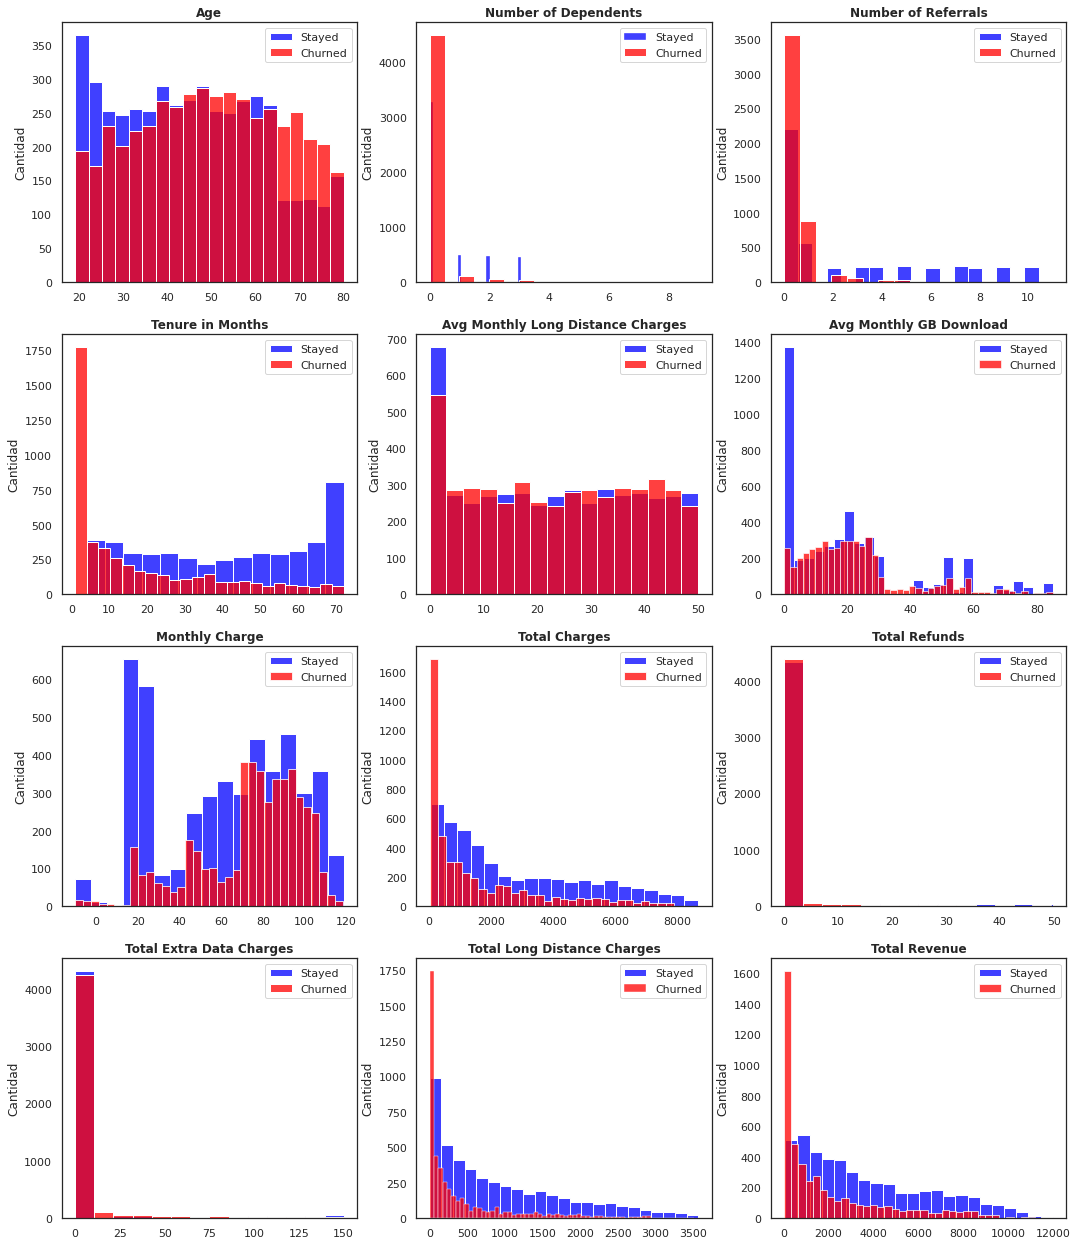

In [56]:
ROWS, COLS = 4, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 22))
row, col = 0, 0

for i, num_col in enumerate(numerical_cols):
  if col == COLS - 1:
      row += 1
  col = i % COLS

  g= sns.histplot(data=balanced_df[balanced_df['Customer Status']== "Stayed"][num_col],color="blue",ax=ax[row, col])
  g.set_ylabel('')

  g= sns.histplot(data=balanced_df[balanced_df['Customer Status']== "Churned"][num_col],color="red",ax=ax[row, col])
  g.set_xlabel('')
  g.set_ylabel('Cantidad')

  title=textwrap.fill(num_col, width=40,
                      break_long_words=False)
  g.set_title(title,fontdict={
 'fontweight': 'bold',
})
  ax[row, col].legend(labels=['Stayed', 'Churned'])  
plt.show()

## ¿Hay alguna tendencia en las columnas numericas?¿Diferencias entre los churned y stayed?

Si las hay.

### Patrones y tendencias de los churned:
* Las personas mayores a 60 años tienden a dejar el servicio que a quedarse.(en un ratio churn-stayed aprox de 2:1)
* Los grupos entre 40 a 60 años son los de mayor volumen y por eso tambien son los que mas cantidad de churned tienen (aprox hay 1 churned por cada stayed)

* Mientras menos personas dependan del cliente mas chances tiene de dejar el servicio.
* Lo mismo ocurre con los referals, mientras menos referals tengan mas chances hay de que dejen el servicio.
* Mientras mas tiempo lleven en el servicio menos chances tienen de dejarlo.
* A la mayor parte de los churned pagaban una tarifa mensual entre 70-110 dolares.

### Otros factores a tener en cuenta
* Los picos que se ven de 0 en el promedio mensual de GB y cargos mensuales por llamadas a distancia se deben a como decidi rellenar los nulos que si bien tiene sentido ya que no usan esos servicios, lo aclaro porque puede distraer.
* La mayoria de las personas entre 20-25 se quedan en el servicio (se comporta de forma inversa a los mayores de 60)

# 6. Comparación churned por categorias Parte 1, generalidades.(seaborn)

In [57]:
balanced_df[categorical_cols]

,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,Male,No,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
1,Male,Yes,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
2,Female,Yes,None,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card
3,Male,No,None,Yes,No,Yes,DSL,Yes,No,Yes,No,No,Yes,No,Yes,One Year,No,Credit Card
4,Male,No,None,No,No,Yes,Cable,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9435,Male,No,None,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal
9436,Female,Yes,Offer D,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
9437,Female,No,Offer E,Yes,No,No,No,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card
9438,Female,No,None,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal


Como estube tocando al rellenar nulos voy a hacer lo siguiente:
Voy a analizar las categorias en general sin entrar en detalle en los servicios telefonicos e internet y luego voy a trabajar con estos en otro grafico usando solo los que si contrataron un servicio u otro, con el fin de evitar un bias a 'No' en las "subcategorias" de cada servicio

In [58]:
general_categorical_cols = categorical_cols[:4] + ['Internet Service'] + categorical_cols[-3:]
phone_cols = [categorical_cols[4]]
internet_cols = categorical_cols[6:-3]

print(f'General Cols\n{general_categorical_cols}\nPhone cols\n{phone_cols}\nInternet cols\n{internet_cols}')

General Cols
['Gender', 'Married', 'Offer', 'Phone Service', 'Internet Service', 'Contract', 'Paperless Billing', 'Payment Method']
Phone cols
['Multiple Lines']
Internet cols
['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']


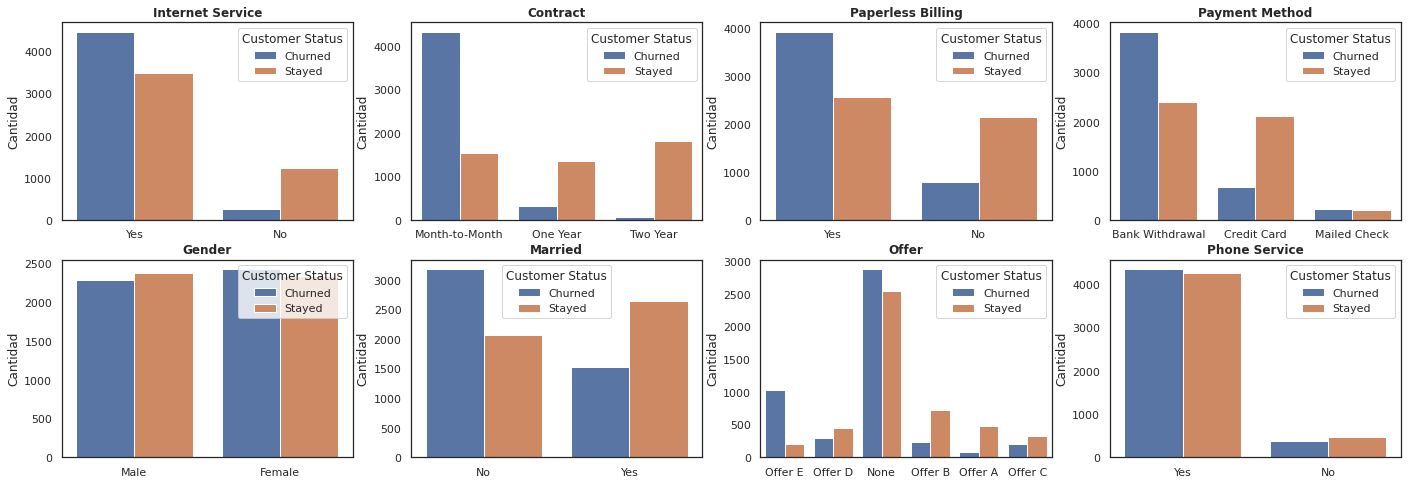

In [59]:
ROWS, COLS = 2, 4
row=0

fig, ax = plt.subplots(ROWS, COLS, figsize=(24, 8))

for i, cat_col in enumerate(general_categorical_cols):
  if col == COLS - 1:
      row += 1
  col = i % COLS
  
  g = sns.countplot(x=cat_col, hue="Customer Status", data=balanced_df, ax=ax[row-1,col])
  g.set_xlabel('')
  title=textwrap.fill(cat_col, width=40,
                      break_long_words=False)
  g.set_title(title,fontdict={
 'fontweight': 'bold',
})
  g.set_ylabel('Cantidad')


## ¿Hay alguna columna categorica en la cual se muestre una tendencia a churn?

Deacuerdo a los graficos tienden a dejar el servicio:

* Los usuarios con servicio a internet 
* Los que tienen un contrato mes a mes
* Los que se les cobra en papel
* Los que pagan por medio del banco
* Los que pagan la oferta E tienen una gran chance de dejarlo
* Los solteros.




Como veo que la gente que contrato el servicio de internet tubo mayor cantidad de churned y los del servicio telefonico estaban parejos, voy a ver solo las columnas categoricas relacionadas con el internet.

# 7. Comparación de churned por categorias Parte 2, servicios de internet.(matplotlib)

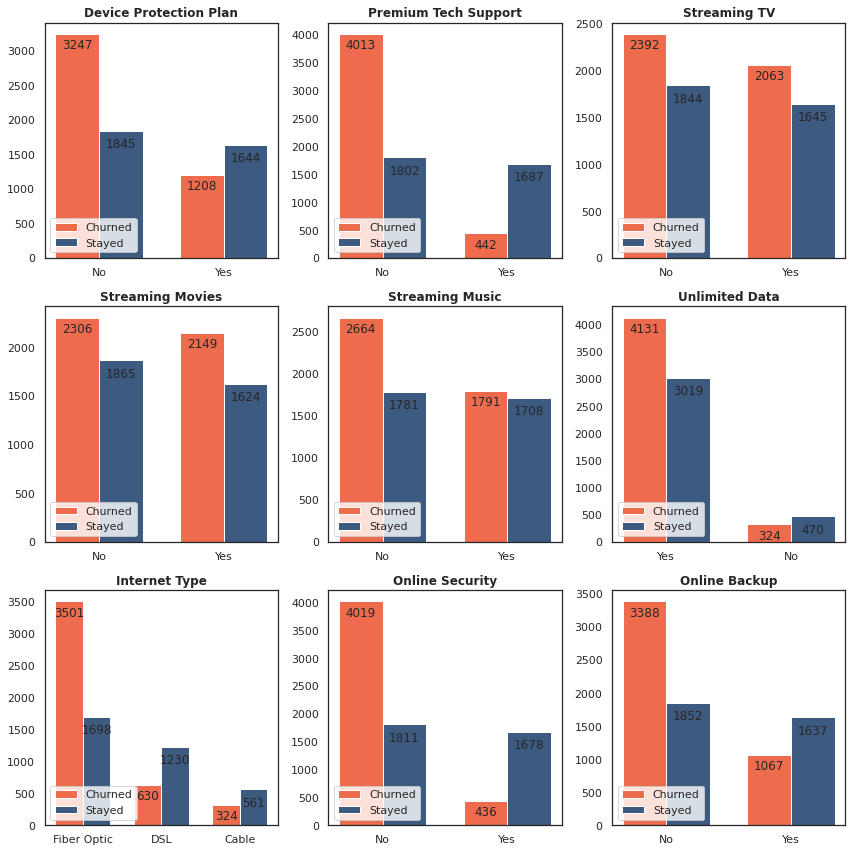

In [60]:
ROWS, COLS = 3,3
row=0

fig, ax = plt.subplots(ROWS, COLS, figsize=(12, 12))

for i, cat_col in enumerate(internet_cols):
  if col == COLS - 1:
      row += 1
  col = i % COLS

  cond_chur = (balanced_df['Internet Service']=='Yes') & (balanced_df['Customer Status']=='Churned') & (balanced_df['Internet Type']!='No') #tube q poner esta ultima porque se me filtraron 12 No, como la cantidad era muy pequeña decidi arreglarlo asi.
  cond_stay = (balanced_df['Internet Service']=='Yes') & (balanced_df['Customer Status']=='Stayed')

  labels = balanced_df[cond_chur][cat_col].value_counts().index
  x = np.arange(len(labels))
  width = 0.35

  data_churn_y = balanced_df[cond_chur][cat_col].value_counts().values
  data_stay_y = balanced_df[cond_stay][cat_col].value_counts().values

  rects1 = ax[row-1,col].bar(x - width/2, height=data_churn_y, color=['#EE6C4D'], width=width, label='Churned',)
  rects2 = ax[row-1,col].bar(x + width/2, height=data_stay_y, color=['#3D5A80'], width=width, label='Stayed')

  title=textwrap.fill(cat_col, width=40,
                      break_long_words=False)
  ax[row-1,col].set_title(title,fontdict={
 'fontweight': 'bold',})  
  ax[row-1,col].set_xticks(x, labels)
  ax[row-1,col].legend(loc='lower left')

  ax[row-1,col].bar_label(rects1, padding=-18)
  ax[row-1,col].bar_label(rects2, padding=-20)

fig.tight_layout()

plt.show()

## ¿Hay algun servicio que ofrecemos cause mas churned?¿Hay alguno que tenga mejor retencion?

Por lo que se puede ver, los servicios de fibra optica , datos ilimitados y streaming de tv y peliculas tienen mayor cantidad de churned por usuario.
  * Parece que hay problemas con la fibra optica, pueden provenir por ser uno de los servicios de internet mas comunes ofrecidos causando que haya mas volumen, asi como tambien puede proveenir de las fallas e inestabilidad en la red.
  * Por los datos ilimitados no creo que sea un problema sino que , al igual que la fibra optica, son los mas comunes a ofrecer.
  * En el caso de los servicios de streaming de peliculas y tv, se puede deber al catálogo de las mismas y/o a inestabilidades en el servicio.Habria que conseguir datos de los mismos para entrar en detalle al por qué.

Por otro lado los usuarios que contratan DSL, Servicio premium de soporte y el servicio de seguridad online tienden a quedarse asi que esos deben funcionar como deben.